# *Import necessary libraries*

In [2]:
# data array vsualization libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
# tensorflow and keras
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model

# *Import MNIST dataset*
The MNIST dataset comprises 60,000 training and 10,000 testing grayscale images of handwritten digits (0 through 9), each represented as 28x28 pixels, serving as a benchmark for image classification tasks in machine learning. It has historically played a crucial role in evaluating various machine learning techniques, particularly in the development and testing of neural networks.

In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


* Test any data sample to check if correct or not !!*

label= 5


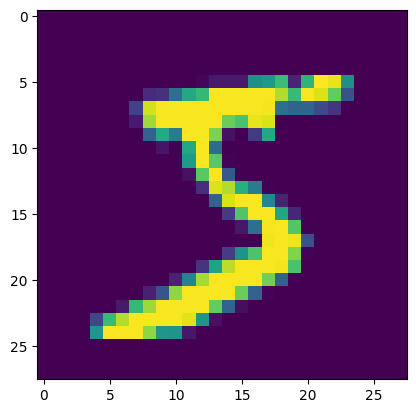

In [8]:
#x_test
#y_test
print('label=',y_train[0])
plt.imshow(x_train[0])

# *Data Preprocessing*

In [12]:
print(x_train.max(), x_train.min(), x_test.max(), x_test.min())

255 0 255 0


In [13]:
y_train[:6]

array([5, 0, 4, 1, 9, 2], dtype=uint8)

# *Rescale the data so the data rwnages from 0 to 1 rather 0 to 255*

In [15]:
x_train_processed, x_test_processed = x_train / 255.0, x_test /255.0
print(x_train_processed.max(), x_train_processed.min(), x_test_processed.max(), x_test_processed.min())


1.0 0.0 1.0 0.0


# *Build a Classifier using MLP (Multi Layer perceptron)*

In [17]:
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Flatten, Dense,Dropout
from keras.optimizers import Adam

In [18]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
 # 784 * 128 + 128 (trainable parameters)
 # 128 * 10 + 10

100480

# *Compile the Model using Adam Optimizer*

Adam (Adaptive Moment Estimation) optimizer is an extension of the stochastic gradient descent (SGD) optimization algorithm. The key idea is to adaptively adjust the learning rates for each parameter based on historical information.

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

 # *Train and Test Model*

In [23]:
history = model.fit(x_train_processed, y_train, epochs=5)
history

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3003 - accuracy: 0.9133
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1452 - accuracy: 0.9570
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1085 - accuracy: 0.9674
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0893 - accuracy: 0.9733
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0775 - accuracy: 0.9761


# *Evaluation*

In [25]:
test_loss, test_acc = model.evaluate(x_test_processed, y_test)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0767 - accuracy: 0.9764
Test Loss:  0.07673200964927673
Test Accuracy:  0.9764000177383423


# *Access Loss and Accuracy details from the training history*


In [26]:
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']

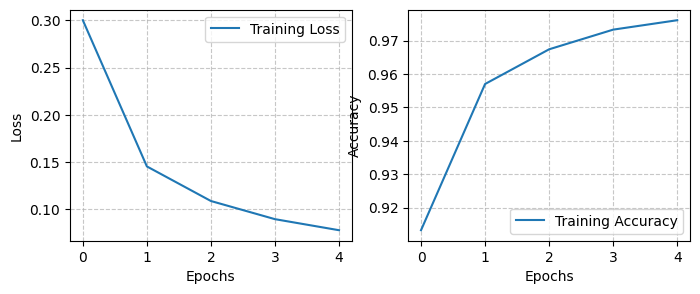

In [36]:
# Create subplots for loss and accuracy
plt.figure(figsize=(8, 3))
# Loss subplot
plt.subplot(1,2,1)
plt.plot(training_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

# Accuracy subplot
plt.subplot(1,2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# *Let's make predictions on the test test and check whether those predictions are correct or not*


In [32]:
#x_test_processed[1]
model.predict(x_test_processed)[2].argmax()


313/313 [==============================] - 1s 2ms/step


1

In [31]:
y_test[0]

7

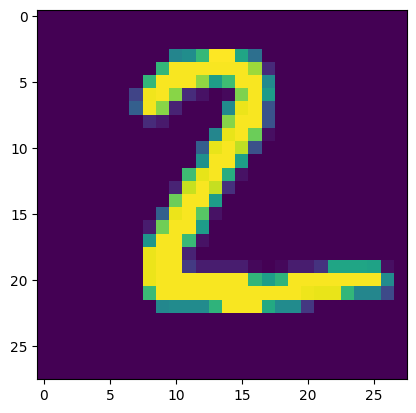

In [43]:
plt.imshow(x_test[1])

In [45]:
y_test[2]

1

313/313 [==============================] - 1s 2ms/step


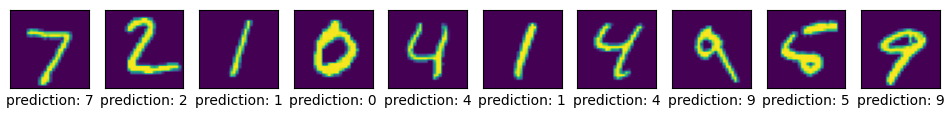

In [54]:
predictions = model.predict(x_test_processed)
plt.figure(figsize=(12, 5))
#plt.figure()
for i in range(10):
    plt.subplot(1,10, i+1)
    prediction = predictions[i].argmax()
    image =plt.imshow(x_test_processed[i])
    plt.xlabel('prediction: '+str(prediction))
    plt.xticks([])  # Hide the x-axis scale and ticks
    plt.yticks([])  # Hide the y-axis scale and ticks


In [48]:
np.array([10,20, 30000,4, 5,7]).argmax()

2